*주의: 파일명은 반드시 학번_이름.ipynb로 저장합니다

=============================================

1. 데이터 탐색하기

=============================================

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


=============== 1.1 첫 세 줄 확인하기 ===============
       Country  Year      Status  Life expectancy  Adult mortality  \
0  Afghanistan  2015  Developing             65.0            263.0   
1  Afghanistan  2014  Developing             59.9            271.0   
2  Afghanistan  2013  Developing             59.9            268.0   

   Infant deaths  Alcohol  Percentage expenditure  Hepatitis B  Measles  ...  \
0             62     0.01               71.279624         65.0     1154  ...   
1             64     0.01               73.523582         62.0      492  ...   
2             66     0.01               73.219243         64.0      430  ...   

   Polio  Total expenditure  Diphtheria  HIV/AIDS         GDP  Population  \
0    6.0               8.16        65.0       0.1  584.259210  33736494.0   
1   58.0               8.18        62.0       0.1  612.696514    327582.0   
2   62.0               8.13        64.0       0.1  631.744976  31731688.0   

   Thinness 1-19 years  Thinness 5-9 years

<ipython-input-2-877beb05aff7>:21: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = df.corr()


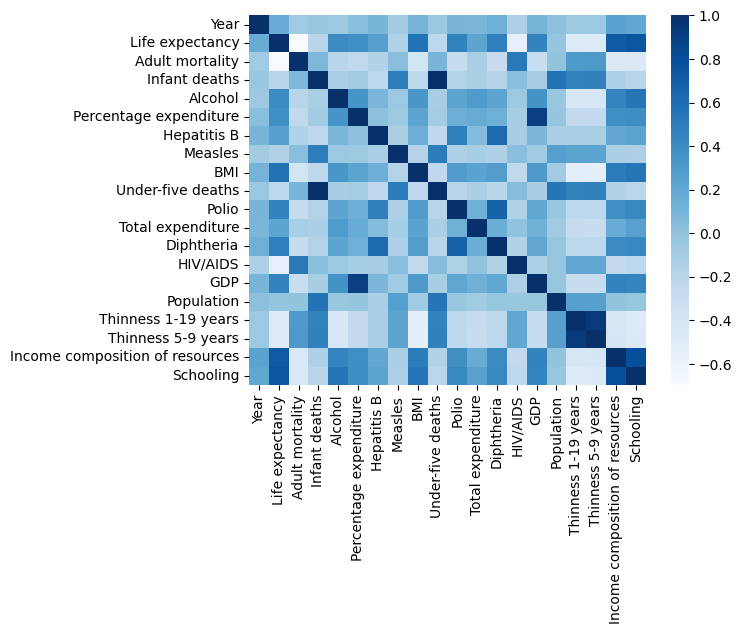

In [ ]:
# 1-0. 파일 불러오기
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/데이터마이닝개론/Data/dataset.csv')
# 1-1. 첫 세 줄 확인하기
print("=============== 1.1 첫 세 줄 확인하기 ===============")
print(df.head(3))
# 1-2. 데이터프레임 사이즈(크기) 확인하기
print("=============== 1.2 데이터프레임 사이즈 확인하기 ===============")
print(df.shape)
print(df.size)
# 1-3. 데이터프레임 기본적인 통계 정보 확인하기
print("=============== 1.3 기본적인 통계 정보 확인하기 ===============")
print(df.describe())
# 1-4. 컬럼 이름 출력해보기
print("=============== 1.4 칼럼 이름 출력해보기 ===============")
print(df.columns)
# 1-5. 특징 간 상관관계 시각화하기
print("=============== 1.5 상관관계 시각화하기 ===============")
cor = df.corr()
sns.heatmap(cor, annot=False, cmap=plt.cm.Blues)
plt.show()

---------------------------------------------

Q1. 탐색 결과로부터 이 데이터에 대해서 알게 된 사실은 무엇인가?

---------------------------------------------

A1.
*   이 데이터는 총 2938개의 행과 22개의 열로 구성되어 총 64636개의 데이터로  이루어져있다.
*   22개의 변수 중 문자형 변수가 2개 (country, Status), 숫자형 변수가 20개이다.
*   기본적인 통계정보를 확인해보았을 때, Population 변수의 값이 과도하게 큰 범위를 가지는 것을 알 수 있다.
*   변수들은 ['Country', 'Year', 'Status', 'Life expectancy', 'Adult mortality',
       'Infant deaths', 'Alcohol', 'Percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'Under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'Thinness 1-19 years',
       'Thinness 5-9 years', 'Income composition of resources', 'Schooling'] 으로 이루어져 있다.
*   변수들 간의 상관관계를 시각화한 결과 'Infant deaths'와 'Under-five-deaths', 'Percentage expenditure'와 'GDP', 'Thinness 1-19 years'와 'Thinness 5-9 years' 등이 높은 양의 상관관계를 가짐을 알 수 있다.
*  'Life expectancy'와 'Adult mortality'는 높은 음의 상관관계를 가짐을 알 수 있다.



=============================================

2. 데이터 특성 분석하기

=============================================

In [ ]:
# 2-1. '기대 수명(Life expectancy)'과의 상관계수만 출력
print("========= 2.1 '기대 수명(Life expectancy)'과의 상관계수만 출력 =========")
cor_target = cor['Life expectancy']
print(cor_target)

# 2-2. '기대 수명(Life expectancy)'과의 상관계수 결과에 절댓값을 취하고 상위 5개를 출력
print("=============== 2.2 상위 5개를 출력 ===============")
cor_taget = abs(cor['Life expectancy'])
select_cols = cor_target[abs(cor['Life expectancy']) > 0.5]
print(select_cols)

# 2-3. '기대 수명(Life expectancy)'과의 상관계수가 높은 5개의 특성에 결측값 검토하기: 몇 개나 있는지
print("=============== 2.3 결측값 검토하기 ===============")
print("'Schooling'변수의 결측값 갯수: ", df['Schooling'].isnull().values.sum())
print("'Income composition of resources'변수의 결측값 갯수: ", df['Income composition of resources'].isnull().values.sum())
print("'Adult mortalitya'변수의 결측값 갯수: ", df['Adult mortality'].isnull().values.sum())
print("'BMI'변수의 결측값 갯수: ", df['BMI'].isnull().values.sum())
print("'HIV/AIDS'변수의 결측값 갯수: ", df['HIV/AIDS'].isnull().values.sum())

# 2-4. 데이터프레임에서 결측 데이터를 삭제하기
df = df.dropna(axis=0)

========= 2.1 '기대 수명(Life expectancy)'과의 상관계수만 출력 =========
Year                               0.170033
Life expectancy                    1.000000
Adult mortality                   -0.696359
Infant deaths                     -0.196557
Alcohol                            0.404877
Percentage expenditure             0.381864
Hepatitis B                        0.256762
Measles                           -0.157586
BMI                                0.567694
Under-five deaths                 -0.222529
Polio                              0.465556
Total expenditure                  0.218086
Diphtheria                         0.479495
HIV/AIDS                          -0.556556
GDP                                0.461455
Population                        -0.021538
Thinness 1-19 years               -0.477183
Thinness 5-9 years                -0.471584
Income composition of resources    0.724776
Schooling                          0.751975
Name: Life expectancy, dtype: float64
=============== 2.2 상위

---------------------------------------------

Q2. 상관계수 분석 결과로부터 이 데이터에 대해서 새롭게 알게 된 사실은 무엇인가?

---------------------------------------------

A2. \
* 한계점을 0.5로 설정하였을 때 '기대수명'과의 상관계수가 가장 높은 상위 5개의 변수가 출력되는데, 이는 순서대로 'Schooling', 'Income composition of resources', 'Adult mortality', 'BMI', 'HIV/AIDS'이다.
* 상위 5개의 변수에는 'HIV/AIDS'를 제외하고 모두 결측값이 존재한다.
  * 'Schooling'변수의 결측값 갯수:  163
  * 'Income composition of resources'변수의 결측값 갯수:  167
  * 'Adult mortality'변수의 결측값 갯수:  10
  * 'BMI'변수의 결측값 갯수:  34
  * 'HIV/AIDS'변수의 결측값 갯수:  0



=============================================

3. 선형 회귀 모델 만들기

=============================================

In [ ]:
# 3-1. 기대 수명을 예측하는 선형 회귀 모델을 만들어보자. 상관계수가 높았던 5개 특징을 선형 회귀 모델의 입력 X로 정의하자
X = df[['Schooling', 'Income composition of resources', 'Adult mortality', 'BMI', 'HIV/AIDS']]
y = df['Life expectancy']

# 3-2. 훈련용과 테스트용 데이터로 분리한다. test_size=.33, random_state=42로 설정한다
# r2 score로 모델 성능을 평가한다
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33, random_state=42)

clf = LinearRegression()
clf.fit(X_train, y_train)

y_pred= clf.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("========== 3-2. 5개 특징만 이용한 선형 회귀 모델  ==========")
print("r2 score is "+str(r2))

# 3-3. 문자열 특징을 제외하고 가능한 한 많은 특징을 사용해서 선형 회귀 모델을 다시 만들어 보자
X_train, X_test, y_train, y_test = train_test_split(df.drop(['Country', 'Status', "Life expectancy"], axis=1), y, test_size=.33, random_state=42)

clf= LinearRegression()
clf.fit(X_train, y_train)

y_pred= clf.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("========== 3-3. 문자열 제외 모든 특징을 사용한 선형 회귀 모델  ==========")
print("r2 score is "+str(r2))


========== 3-2. 5개 특징만 이용한 선형 회귀 모델  ==========
r2 score is 0.8143633625822568
========== 3-3. 문자열 제외 모든 특징을 사용한 선형 회귀 모델  ==========
r2 score is 0.8383257378575212


---------------------------------------------

Q3. 3-2와 3-3의 결과로부터 새롭게 알게 된 사실은 무엇인가?

---------------------------------------------

A3.
* 기대수명과 상관계수가 높은 5개의 특징을 이용한 선형 회귀 모델의 r2 score는 0.81436이며 문자열 제외 모든 특징을 사용한 선형 회귀 모델의 r2 score는 0.8383이다.
* 두번째 모델의 성능이 더 높은 것을 알 수 있다. (= 설명력이 높다)

=============================================

4. Regularization penalty 추가하기

=============================================

========== 4-2. Lasso 회귀 성능 r2 score  ==========
[0.8142535715011412, 0.8132421857243007, 0.7916089788845498, 0.6382839065250427, 0.5048902384554472, -0.004309583280322382]
========== 4-3. Ridge 회귀 성능 r2 score  ==========
[0.8143623973580962, 0.8143537134888319, 0.8134323431517154, 0.8074396744784152, 0.7962103709141171, 0.7932011399695371]


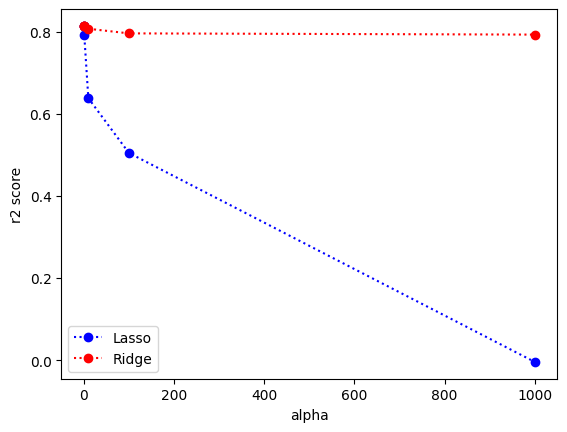

In [ ]:
# 4-1. Regularization penalty를 추가해보자
# 입력은 5개 특성만 사용한다
# 훈련용과 테스트용 데이터로 분리한다. test_size=.33, random_state=42로 설정한다
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

X = df[['Schooling', 'Income composition of resources', 'Adult mortality', 'BMI', 'HIV/AIDS']]
y = df['Life expectancy']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33, random_state=42)

# 4-2. alpha값을 [0.001, 0.01, 1, 10, 100, 1000] 범위 안에서 바꿔가면서 Lasso 회귀 성능을 r2 score로 구해 보자
### alpha 구간
rng = [0.001, 0.01, 1, 10, 100, 1000]

### Lasso regression r2 score 저장용 list
r2_list1 = list()

### alpha를 조정하며 모델 적합 후 r2 score 계산
for a in rng:
  clf = Lasso(alpha = a)
  clf.fit(X_train, y_train)

  y_pred = clf.predict(X_test)
  r2 = r2_score(y_test, y_pred)
  r2_list1.append(r2)

### r2 score 출력
print("========== 4-2. Lasso 회귀 성능 r2 score  ==========")
print(r2_list1)

# 4-3. alpha값을 [0.001, 0.01, 1, 10, 100, 1000] 범위 안에서 바꿔가면서 Ridge 회귀 성능을 r2 score로 구해 보자
### Ridge regression r2 score 저장용 list
r2_list2 = list()

### alpha를 조정하며 모델 적합 후 r2 score 계산
for a in rng:
  clf = Ridge(alpha = a)
  clf.fit(X_train, y_train)

  y_pred = clf.predict(X_test)
  r2 = r2_score(y_test, y_pred)
  r2_list2.append(r2)

### r2 score 출력
print("========== 4-3. Ridge 회귀 성능 r2 score  ==========")
print(r2_list2)

# 4-4. x축이 alpha이고 y축이 r2 score인 그래프를 그려보자
# lasso 성능은 파란색 점선으로, ridge 성능은 빨간색 점선으로 한 그래프 상에 나타내고,
# 범례의 위치는 좌측 하단으로 설정한다
import matplotlib.pyplot as plt

plt.plot(rng, r2_list1,  "bo", linestyle = 'dotted', label='Lasso')
plt.plot(rng, r2_list2,  "ro", linestyle = 'dotted', label='Ridge')
plt.xlabel('alpha')
plt.ylabel('r2 score')
plt.legend(loc = 'lower left')
plt.show()


---------------------------------------------

Q4a. 어느 경우에 성능이 가장 좋은가?

Q4b. 4-2,4-3,4-4의 결과로 새롭게 알게 된 사실은 무엇인가?

---------------------------------------------

A4a.
* Ridge regression에서 alpha가 0.001인 경우에 성능이 가장 좋다.

A4b.
* 모델이 복잡해지지 않도록 regression에 패널티를 추가할 수 있는데 alpha를 이용하여 그 정도를 조절할 수 있다.
* 이때 alpha의 값이 커질수록 모델이 과적합되어 성능이 떨어짐을 알 수 있다.
* 특히 Lasso regression은 alpha가 1000인 경우에 음수의 r2 score를 가지는데, 이는 일괄 평균으로 예측하는 것보다 모델의 성능이 떨어진다는 것을 의미한다.
* Lasso와 Ridge를 비교해보았을 때 Ridge모델에서 더 높은 성능을 보인다.

=============================================

5. 수업에서 배운 내용을 활용하여 자유롭게

  선형 회귀 모델 성능을 개선시켜 보자

  *주석 사용 필수
  
  **모델 성능 평가는 4번과 동일하게: test_size=.33, random_state=42, r2 score 사용

=============================================

In [ ]:
##### 데이터 전처리 #####
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/데이터마이닝개론/Data/dataset.csv')

## 0. 범주형 변수 Encoding 전 범주형 변수의 특성을 파악한다.
print("'Country' 변수의 고유값: ", df['Country'].unique())
print("'Status' 변수의 고유값: ", df['Status'].unique())

'Country' 변수의 고유값:  ['Afghanistan' 'Albania' 'Algeria' 'Angola' 'Antigua and Barbuda'
 'Argentina' 'Armenia' 'Australia' 'Austria' 'Azerbaijan' 'Bahamas'
 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus' 'Belgium' 'Belize' 'Benin'
 'Bhutan' 'Bolivia (Plurinational State of)' 'Bosnia and Herzegovina'
 'Botswana' 'Brazil' 'Brunei Darussalam' 'Bulgaria' 'Burkina Faso'
 'Burundi' "Côte d'Ivoire" 'Cabo Verde' 'Cambodia' 'Cameroon' 'Canada'
 'Central African Republic' 'Chad' 'Chile' 'China' 'Colombia' 'Comoros'
 'Congo' 'Cook Islands' 'Costa Rica' 'Croatia' 'Cuba' 'Cyprus' 'Czechia'
 "Democratic People's Republic of Korea"
 'Democratic Republic of the Congo' 'Denmark' 'Djibouti' 'Dominica'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Equatorial Guinea'
 'Eritrea' 'Estonia' 'Ethiopia' 'Fiji' 'Finland' 'France' 'Gabon' 'Gambia'
 'Georgia' 'Germany' 'Ghana' 'Greece' 'Grenada' 'Guatemala' 'Guinea'
 'Guinea-Bissau' 'Guyana' 'Haiti' 'Honduras' 'Hungary' 'Iceland' 'India'
 'Indonesia' 'Iran (I

In [ ]:
## 1. 범주형 변수에 대해 Encoding 한다.
# 고유값 개수가 많은 'Country'변수는 Label Encoding,
# 고유값 개수가 적은 'Status'변수는 One-hot Encoding
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder

# 먼저 'Country' 변수에 대해 Label Encoding부터 수행한다.
enc = preprocessing.LabelEncoder()

out_enc1 = enc.fit_transform(df['Country'])
df_enc1= pd.DataFrame(data= out_enc1, columns = ['Country'])

# 다음으로 'Status' 변수에 대해 One-hot Encoding을 수행한다.
enc2 = OneHotEncoder(sparse_output=False)

out_enc2 = enc2.fit_transform(df[['Status']])
new_cols = enc2.get_feature_names_out(['Status']).tolist()
df_enc2= pd.DataFrame(data= out_enc2, columns = new_cols)

# 변환한 두 범주형 데이터를 하나의 데이터프레임으로 합친다.
df_enc = pd.concat([df_enc1, df_enc2], axis=1)

## 2. 변환한 범주형 변수 데이터프레임과 기존 수치형 변수 데이터프레임을 합친 후 최종 데이터프레임을 출력한다.
cols = ['Life expectancy', 'Year', 'Adult mortality', 'Infant deaths', 'Alcohol', 'Percentage expenditure', 'Hepatitis B', 'Measles', 'BMI', 'Under-five deaths', 'Polio', 'Total expenditure', 'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'Thinness 1-19 years', 'Thinness 5-9 years', 'Income composition of resources', 'Schooling']
df = pd.concat([df[cols], df_enc], axis=1)
print(df.head())

   Life expectancy  Year  Adult mortality  Infant deaths  Alcohol  \
0             65.0  2015            263.0             62     0.01   
1             59.9  2014            271.0             64     0.01   
2             59.9  2013            268.0             66     0.01   
3             59.5  2012            272.0             69     0.01   
4             59.2  2011            275.0             71     0.01   

   Percentage expenditure  Hepatitis B  Measles   BMI  Under-five deaths  ...  \
0               71.279624         65.0     1154  19.1                 83  ...   
1               73.523582         62.0      492  18.6                 86  ...   
2               73.219243         64.0      430  18.1                 89  ...   
3               78.184215         67.0     2787  17.6                 93  ...   
4                7.097109         68.0     3013  17.2                 97  ...   

   HIV/AIDS         GDP  Population  Thinness 1-19 years  Thinness 5-9 years  \
0       0.1  584.2

In [ ]:
## 3. 결측치가 포함된 행을 삭제한다.
df = df.dropna(axis=0)
print(df.shape)

## 4. StandardScaler를 이용해 데이터를 정규화한 후 선형회귀모형에 적합한다.
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(df.drop(['Life expectancy'], axis=1), df['Life expectancy'], test_size=.33, random_state=42)

scaler = StandardScaler()

scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

clf= LinearRegression()
clf.fit(X_train, y_train)

y_pred= clf.predict(X_test)

r2 = r2_score(y_test, y_pred)
print("r2 score is "+str(r2))

(1649, 23)
r2 score is 0.8390063474967354
